HYS 60323 PROJECT – F24 Due Mon. Dec. 9 (1:30pm)
Project: Shielding a nuclear reactor. (AJ)
A beam of neutrons bombards a reactor’s wall. Considering motion of
neutrons as a random walk on (x,y) plane find probabilities for neutrons
(as a function of the shield size, D):
1. to be back in the reactor
2. to be ‘captured’ in the shield
3. to get through the shield.

   
First Trial Conditions:
1. The initial conditions, the first step is forward 3 steps into the shield
(x0 = 0; x1 = 3)
2. The future steps, the neutron cannot step back, only forward, up, or
down, relative to its current motion. (ignore left or right for this
problem.)
3. The probability to go “forward” (not scattered) is two times more than
changing a direction (being scattered).
4. On each forward (non-scattered) move the neutron loses one unit of
energy.
4. On each scatter (up or down), the neutron loses either 2.0 (60%),
4.0 (35%), or 10.0 (5%) units of energy.
5. Initial neutron energy is enough for 1500 units.
6. Initial neutron velocity is perpendicular to the shield (e.g., forward).
Assume that the probability P to get through the shield has the asymptotic
exponential dependence as P ∼ e−alphaD where D is the size of the shield in
units of x. e.g., a shield of size D = 15 would run from x = 0-15, and
“infinite” in y. (see figure below)
Use a ‘particle’ class with methods in your code to track the particles in
code. (NOTE: These Monte Carlo runs will take time to build your statistics.)
Determine the exponent  by fitting the exponential to the resulting data.
(NOTE: measure the shield’s size in ”steps”, where one step corresponds to
an average distance that neutrons move between collisions. Also, make sure
you conduct enough tests at each D to get a good measurement of  and its
uncertainty)


Second Trial Conditions:
Consider initial neutron energy as a normal (Gaussian) distribution with a
mean value of 750 steps, and a standard deviation of 75 steps, how does
this effect your value for  and its uncertainty?
For full credit: Email me a report (written in LaTeX) including all required
outputs and plots, and a user-friendly, working, self-contained Jupyter
notebook.

# Importing Libraries I'm using

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import scipy.optimize as opt

# First Trial Conditions

# Making all constants I'm using

In [3]:
# Initial position of neutron
x0 = 0
# Position of neutron after first step (The first step is forward 3 steps into the shield)
x1 = 3
# The probability to go forward (not scattered) is two times more the changing a direction (being scattered)
#2 * x + x = 1 #Solve for x
#x = 1/3
Probability_Being_Scattered = 1/3
Probability_Not_Scattered = 2*Probability_Being_Scattered
# Initial neutron energy is enough for 1500 units
E_initial = 1500
# make sure each test at each D number of neutron at each shield. The larger the number, the better measurement of alpha (more precise)
Number_Of_Neutrons = 1000
# This is a numerical representation of the direction that the neutron is facing
Direction = 0 



# Defining needed functions

In [5]:
# Defining exponential function that will be fitted to test data
def exponential (x,alpha): 
    return np.exp(x*alpha)

# Defining function which  will find and optimize parameters for the best value of alpha
# Monte Carlo-version of 1 parameter Curve Fit for exponential function that can use BOTH x and Y errors
def mcFit1(func, x, y, x_err=0.1, y_err=0.1, p0=[1]):
    paramA = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0, maxfev=10000, bounds=(-10,10)) # maxfev is the number of tries to fit the function properly, the bigger the better. Bounds set for small number so the program can run faster.
        paramA.append(popt[0])
    return (np.median(paramA))

# Defining neutron, function that describes energy loss and motion function

In [7]:
# Making a class thats an objest (Neutron)
class Neutron(object):
    def __init__(self,x,y,E,Direction): # Defining all parameters describing neutron
        self.x = x #Position of neutron in x-direction
        self.y = y #Position of neutron in y-direction
        self.E = E #The energy of neutron
        self.Direction = Direction #The direction that the neutron is facing

# Function that describes energy loss of neutron:
#On each scatter (up or down), the neutron loses either 2.0 (60%), 4.0 (35%), or 10.0 (5%) units of energy.

    def E_loss(self):
        rand_E_loss = rand.random() #Getting some random number from 0 to 1 (probability)
        if 0 < rand_E_loss <= 0.6: # 60% f numbers that I generate will be less then 0.60
            self.E = self.E - 2
        elif 0.6 < rand_E_loss <= 0.95: # 35% of numbers that I generate will be in range from 0.95 to 0.6
            self.E = self.E - 4
        else:
            self.E = self.E - 10 # 5% of numbers will be in range from 1 to 0.95
    
    # Function that describes motion of neutron: (number of steps)
    
    def scatter(self):
        rand_scatter = rand.random() # Selects if the neutron is scattered or not # random number that determines the probability of the neutron motion  
        rand_up_or_down = rand.random() # If the neutron was scattered, was it scattered up or down? # random number which will determine will the neutron turn up or down while scattering 
        if rand_scatter <= Probability_Being_Scattered: # If the neutron was scattered# If the generated number was smaller or equal the probability of being scattered 
            self.E_loss() #run function to calculate energy loss
            if rand_up_or_down <= 0.5: #checking direction of scattering (up or down). 50% of time while running this function I will get number smaller or equal 0.5
                self.Direction = self.Direction - 1 # Neutron is scattered down
            else:
                self.Direction = self.Direction + 1 #Neutron is scattered up
            return(self.x, self.y, self.E)
        
        else: #If the neutron is not being scattered # Checking the direction of scattering 
            if self.Direction%4 == 0:
                self.x = self.x + 1 # neutron is facing positive x direction and it moves 1 step forward
            elif self.Direction%4 == 2:
                self.x = self.x - 1 # # neutron is facing negative x direction and it moves 1 step forward (backwords in term of positive x)
            elif self.Direction%4 == 1:
                self.y = self.y + 1 # neutron is facing positive y direction and it moves 1 step forward
            elif self.Direction%4 == 3:
                self.y = self.y - 1 # neutron is facing negative y direction and it moves 1 step forward (backwords in term of positive y)
            self.E = self.E - 1  # One ach scatter (up or down) the neutron loses one unit of energy.
            return(self.x, self.y, self.E)



# Do the test run

In [9]:
# A beam of neutron bombards a reactor's wall. Considering motion of neutrons as random walk on (x,y) plane I'm looking for probabilities for neutrons (as a function of the shield size, D):
# 1 to be back in reactor
# 2 to be "captured" in the shield
# 3 to get through the shield

# Create two lists 

P_Get_through_shield_total = [] #Probability that neutron escapes
D = [] # shield size

# Generating 100 sizes of shields in a list
for i in range(1000):
    D.append(i)

# Finding probabilities of 3 possibilities
for i in range(1000):
    P_Get_through_shield = 0
    P_Captured = 0
    P_Back_in_reactor = 0
    for j in range(Number_Of_Neutrons):
        n = Neutron(x1, 1, E_initial, 0) # creating neutron called n, it has position x1,1 (x,y), energy Ei and displacement 0.
        # Now for generated neutrons I'll send them to the shield and see what happens to them:
        while True: # This will always run unless this 3 posibilities
            if n.x >= D[i]: # If neutrons x-position is greater then or equal to the size of the shield it gets through the shield.
                P_Get_through_shield = P_Get_through_shield + 1/Number_Of_Neutrons #If this condition is reached the probability gets higher
                break # Going to next neutron
            elif n.x <= 0: #If neutrons x-position is less then or equal to 0 the neutron goes back to the reactor.
                P_Back_in_reactor = P_Back_in_reactor + 1/Number_Of_Neutrons #If this condition is reached the probability gets higher
                break # Going to next neutron
            elif n.E <= 0: # If neutrons energy is smaller or equal to zero, the neutron is captured in the shield.
                P_Captured = P_Captured + 1/Number_Of_Neutrons #If this condition is reached the probability gets higher
                break # No other conditions to check
            else: 
                n.scatter() # Running the code if nothing stopped the neutron. 
    P_Get_through_shield_total.append(P_Get_through_shield)

In [11]:
expA = mcFit1(exponential, D, P_Get_through_shield_total, 0.001, 0.001, p0=[(-1)]) # Those are optimized values of  
print(f'EXP: {expA:.3f}')

EXP: -0.056


In [127]:
print(P_Get_through_shield_total)

[1.0000000000000007, 1.0000000000000007, 1.0000000000000007, 1.0000000000000007, 0.8500000000000005, 0.6900000000000004, 0.7500000000000004, 0.5900000000000003, 0.5900000000000003, 0.4400000000000002, 0.5100000000000002, 0.4100000000000002, 0.38000000000000017, 0.3900000000000002, 0.37000000000000016, 0.36000000000000015, 0.2800000000000001, 0.26000000000000006, 0.3200000000000001, 0.2700000000000001, 0.3100000000000001, 0.3200000000000001, 0.2800000000000001, 0.2900000000000001, 0.21000000000000005, 0.2800000000000001, 0.23000000000000007, 0.22000000000000006, 0.25000000000000006, 0.25000000000000006, 0.26000000000000006, 0.18000000000000002, 0.24000000000000007, 0.21000000000000005, 0.17, 0.13999999999999999, 0.21000000000000005, 0.09, 0.18000000000000002, 0.16, 0.12999999999999998, 0.12999999999999998, 0.15, 0.17, 0.13999999999999999, 0.11999999999999998, 0.08, 0.10999999999999999, 0.11999999999999998, 0.09999999999999999, 0.10999999999999999, 0.07, 0.060000000000000005, 0.099999999

In [13]:

avg_x = (1/len(P_Get_through_shield_total) * sum(P_Get_through_shield_total)) # average value of x (probability of getting through the shield)
avg_x2 = (1/len(P_Get_through_shield_total) * sum(np.array(P_Get_through_shield_total)**2)) #average value of x^2
sigma = np.sqrt((avg_x2 - avg_x**2) / (len(P_Get_through_shield_total)-1)) #simga = error value

print('The average probability is:',avg_x)
print('The average probability squared is:', avg_x2)
print('The error in our alpha value is:', sigma)

The average probability is: 0.019774000000000017
The average probability squared is: 0.009629978000000011
The error in our alpha value is: 0.0030410878216748606


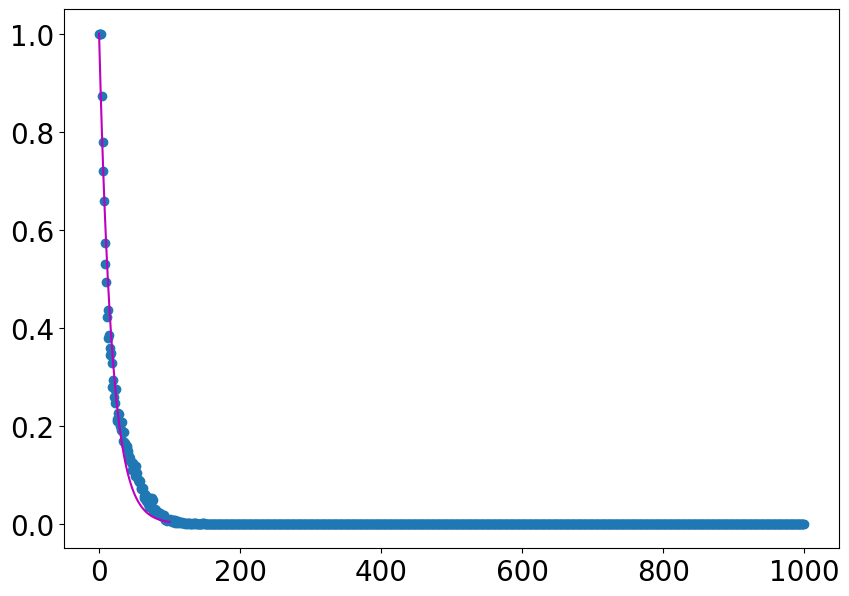

In [15]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize = 20)
ax1.yaxis.set_tick_params(labelsize = 20)

ax1.scatter(D,P_Get_through_shield_total)
x_linspace = np.linspace(0,100)

ax1.plot(x_linspace,exponential(x_linspace,expA),'m',label='Fit:exp')
plt.show()

# Second Trial

In [17]:
# Generating neutrons that have normal distribution of energy
E_Normal_Distribution = np.random.normal(750,75,Number_Of_Neutrons) 

In [27]:
# A beam of neutron bombards a reactor's wall. Considering motion of neutrons as random walk on (x,y) plane I'm looking for probabilities for neutrons (as a function of the shield size, D):
# 1 to be back in reactor
# 2 to be "captured" in the shield
# 3 to get through the shield

# Create two lists 

P_Get_through_shield_total = [] #Probability that neutron escapes
D = [] # shield size

# Generating 100 sizes of shields in a list
for i in range(1000):
    D.append(i)

# Finding probabilities of 3 possibilities
for i in range(1000):
    P_Get_through_shield = 0
    P_Captured = 0
    P_Back_in_reactor = 0
    for j in range(Number_Of_Neutrons):
        n = Neutron(x1, 1, E_Normal_Distribution[i], 0) # creating neutron called n, it has position x1,1 (x,y), energy Ei and displacement 0.
        # Now for generated neutrons I'll send them to the shield and see what happens to them:
        while True: # This will always run unless this 3 posibilities
            if n.x >= D[i]: # If neutrons x-position is greater then or equal to the size of the shield it gets through the shield.
                P_Get_through_shield = P_Get_through_shield + 1/Number_Of_Neutrons #If this condition is reached the probability gets higher
                break # Going to next neutron
            elif n.x <= 0: #If neutrons x-position is less then or equal to 0 the neutron goes back to the reactor.
                P_Back_in_reactor = P_Back_in_reactor + 1/Number_Of_Neutrons #If this condition is reached the probability gets higher
                break # Going to next neutron
            elif n.E <= 0: # If neutrons energy is smaller or equal to zero, the neutron is captured in the shield.
                P_Captured = P_Captured + 1/Number_Of_Neutrons #If this condition is reached the probability gets higher
                break # No other conditions to check
            else: 
                n.scatter() # Running the code if nothing stopped the neutron. 
    P_Get_through_shield_total.append(P_Get_through_shield)

In [29]:
expA = mcFit1(exponential, D, P_Get_through_shield_total, 0.001, 0.001, p0=[(-1)]) # Those are optimized values of  
print(f'EXP: {expA:.3f}')

EXP: -0.060


In [31]:
avg_x = (1/len(P_Get_through_shield_total) * sum(P_Get_through_shield_total))
avg_x2 = (1/len(P_Get_through_shield_total) * sum(np.array(P_Get_through_shield_total)**2))
sigma = np.sqrt((avg_x2 - avg_x**2) / (len(P_Get_through_shield_total)-1))

print('The average probability is:',avg_x)
print('The average probability squared is:', avg_x2)
print('The error in our alpha value is:', sigma)

The average probability is: 0.017450000000000014
The average probability squared is: 0.009320738000000016
The error in our alpha value is: 0.003004207176737446


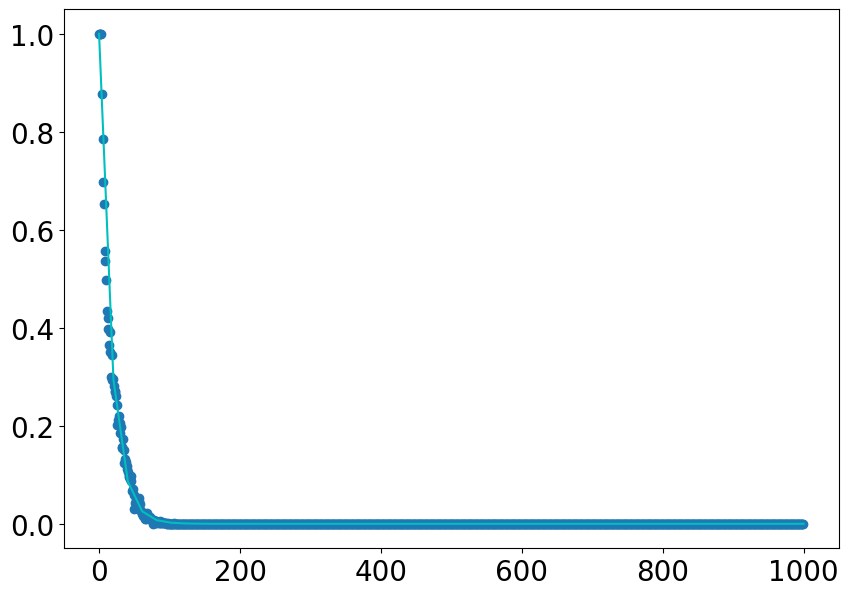

In [33]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize = 20)
ax1.yaxis.set_tick_params(labelsize = 20)

ax1.scatter(D,P_Get_through_shield_total)
x_linspace = np.linspace(0,1000)

ax1.plot(x_linspace,exponential(x_linspace,expA),'c',label='Fit:exp')
plt.show()